# Classification on Customer Churn Dataset for the Data Analytics Session
by Rathachai C.


## 0) To load libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score



---



## 1) To load data and check

In [0]:
churn = pd.read_csv('https://rathachai.github.io/DA101/data/customer-churn-data.csv')

In [3]:
churn

,Gender,Age,Payment Method,LastTransaction,Churn
0,male,64,credit card,98,loyal
1,male,35,cheque,118,churn
2,female,25,credit card,107,loyal
3,female,39,credit card,177,NaN
4,male,39,credit card,90,loyal
...,...,...,...,...,...
991,female,29,credit card,33,loyal
992,male,84,credit card,124,loyal
993,male,20,credit card,60,NaN
994,male,19,credit card,49,loyal


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
Gender             996 non-null object
Age                996 non-null int64
Payment Method     996 non-null object
LastTransaction    996 non-null int64
Churn              900 non-null object
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


In [5]:
churn.describe()

,Age,LastTransaction
count,996.000000,996.000000
mean,45.616466,111.072289
std,18.776749,44.956045
min,17.000000,1.000000
25%,30.000000,77.000000
50%,44.000000,110.000000
75%,58.000000,145.000000
max,91.000000,223.000000




---



## 2) To do data pre-processing

In [0]:
churn.dropna(inplace=True)

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 995
Data columns (total 5 columns):
Gender             900 non-null object
Age                900 non-null int64
Payment Method     900 non-null object
LastTransaction    900 non-null int64
Churn              900 non-null object
dtypes: int64(2), object(3)
memory usage: 42.2+ KB


## 3) To do data exploration

### 3.1) to view data

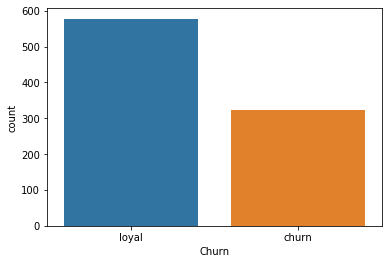

In [8]:
sns.countplot(x="Churn", data=churn);


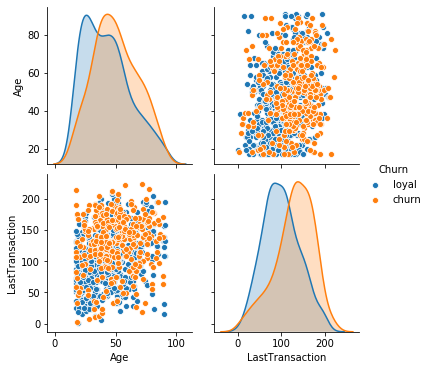

In [9]:
sns.pairplot(churn, hue="Churn")

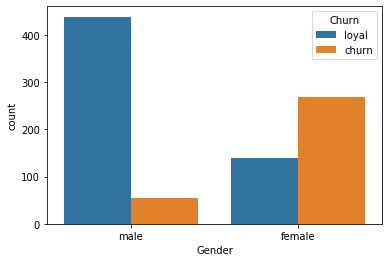

In [10]:
sns.countplot(x="Gender", hue="Churn", data=churn);


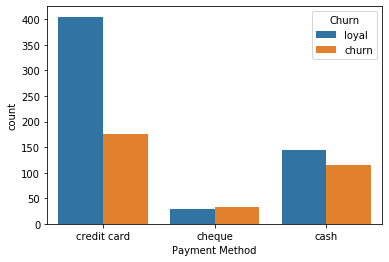

In [11]:
sns.countplot(x="Payment Method", hue="Churn", data=churn);

### 3.2) to do data encoder

In [0]:
lb_make = LabelEncoder()

In [0]:
churn["Gender Code"] = lb_make.fit_transform(churn["Gender"])

### 3.3) to do one-hot encoding

In [0]:
churn = pd.get_dummies(churn, columns=["Payment Method"])

In [15]:
churn

,Gender,Age,LastTransaction,Churn,Gender Code,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,male,64,98,loyal,1,0,0,1
1,male,35,118,churn,1,0,1,0
2,female,25,107,loyal,0,0,0,1
4,male,39,90,loyal,1,0,0,1
5,female,28,189,churn,0,0,1,0
...,...,...,...,...,...,...,...,...
990,male,19,92,loyal,1,0,0,1
991,female,29,33,loyal,0,0,0,1
992,male,84,124,loyal,1,0,0,1
994,male,19,49,loyal,1,0,0,1




---



## 4) To do **`Logistic Regression`**

### 4.1) To select data

In [0]:
X = churn[["Age", "LastTransaction", "Gender Code", "Payment Method_cash", "Payment Method_cheque", "Payment Method_credit card"]]
y = churn["Churn"]

In [17]:
X

,Age,LastTransaction,Gender Code,Payment Method_cash,Payment Method_cheque,Payment Method_credit card
0,64,98,1,0,0,1
1,35,118,1,0,1,0
2,25,107,0,0,0,1
4,39,90,1,0,0,1
5,28,189,0,0,1,0
...,...,...,...,...,...,...
990,19,92,1,0,0,1
991,29,33,0,0,0,1
992,84,124,1,0,0,1
994,19,49,1,0,0,1


In [18]:
y

0      loyal
1      churn
2      loyal
4      loyal
5      churn
       ...  
990    loyal
991    loyal
992    loyal
994    loyal
995    loyal
Name: Churn, Length: 900, dtype: object

### 4.2) to split train and test datasets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### 4.3) to train and create a linear regression model

In [0]:
clf = LogisticRegression()

In [21]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
clf.coef_

array([[-0.02332472, -0.00775513,  2.76546142, -0.24696719, -0.32714535,
         0.57098283]])

In [23]:
clf.intercept_

array([1.08269557])

### 4.4) To predict from the test set

In [0]:
y_pred = clf.predict(X_test)

In [25]:
y_pred

array(['loyal', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'churn',
       'churn', 'loyal', 'loyal', 'churn', 'loyal', 'churn', 'loyal',
       'loyal', 'loyal', 'churn', 'churn', 'loyal', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'churn', 'churn', 'churn', 'loyal',
       'churn', 'churn', 'loyal', 'churn', 'loyal', 'churn', 'loyal',
       'loyal', 'churn', 'loyal', 'loyal', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'loyal',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'loyal', 'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'chu

### 4.5) To evaluate the predicted value with the test set

In [26]:
cm_labels = churn["Churn"].unique()
print(cm_labels)
confusion_matrix(y_test, y_pred, labels=cm_labels)

['loyal' 'churn']


array([[154,  17],
       [ 23,  76]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       churn       0.82      0.77      0.79        99
       loyal       0.87      0.90      0.89       171

    accuracy                           0.85       270
   macro avg       0.84      0.83      0.84       270
weighted avg       0.85      0.85      0.85       270



In [28]:
f1 = f1_score(y_test, y_pred, average='weighted')
print ("F1 =", f1)

F1 = 0.8508141762452107




---



## 5) To do **Decision Tree**

In [29]:
# Import required libraries
from sklearn import tree

# Select Data
X = churn[["Age", "LastTransaction", "Gender Code", "Payment Method_cash", "Payment Method_cheque", "Payment Method_credit card"]]
y = churn["Churn"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Train and Create a Model
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

# Predict
y_pred = clf.predict(X_test)

# Print Confusion Matrix
print("***** Confusion Matrix *****")
cm_labels = churn["Churn"].unique()
print(cm_labels)
print(confusion_matrix(y_test, y_pred, labels=cm_labels))

# Print Report
print()
print("***** Report *****")
print(classification_report(y_test,y_pred))

# Check F1 value
print()
print("***** F1 *****")
f1 = f1_score(y_test, y_pred, average='weighted')
print ("F1 = ", f1)

***** Confusion Matrix *****
['loyal' 'churn']
[[171   0]
 [  0  99]]

***** Report *****
              precision    recall  f1-score   support

       churn       1.00      1.00      1.00        99
       loyal       1.00      1.00      1.00       171

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270


***** F1 *****
F1 =  1.0


## Exercises


1.   work with 5-fold cross-validation  (hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
2.   use other classifier techiques e.g. Bayes, SVN, ANN,


### do your exerciese here

In [0]:
# run your code here